### Week4-3. 실제 인구증가 모델

Growth rate가 고정된 인구증가 모델미분방정식인 $N = N_0 e^{rt}$은 지수함수적으로 증가하는 $N = N_0 e^{rt}$의 해를 주기 때문에 현실적인 모델이 아니다. 오히려 인구증가와 함께 Growth rate가 변하는 아래의 미분방정식 형태가 현실적이다.
$$ N(t+\Delta t) - N(t) = r(N(t))N(t).$$
여기서 아래의 관계식을 이용하면 $M$개의 개체수 이상에서 인구가 더이상 증가하지 않는 현실적인 미분방정식의 해를 구할수 있다.
$$ r(N) = \bar{r}(1 - N/M) $$

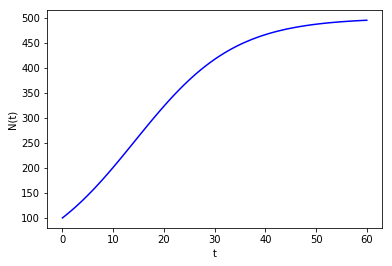

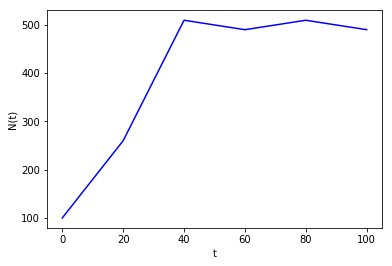

In [3]:
from ode_FE import ode_FE
import matplotlib.pyplot as plt

for dt, T in zip((0.5,20), (60, 100)):    
    # zip([1,2,3],[4,5,6]) = [(1,4),(2,5),(3,6)] / zip([1,2,3],[4,5,6],[7,8,9]) = [(1,4,7),(2,5,8),(3,6,9)]
    # Choose N(0)=100, dt = 0.5 month, T = 60 months, r = 0.1 growth rate, M = 500 Maximum population
    u, t = ode_FE(f=lambda u, t: 0.1*(1 - u/500.)*u, \
                                 U_0=100, dt=dt, T=T)
    plt.figure()   # Make separate figures for each pass in the loop
    plt.plot(t, u, 'b-')
    plt.xlabel('t'); plt.ylabel('N(t)')
    #plt.savefig('tmp_%g.png' % dt); plt.savefig('tmp_%g.pdf' % dt)
                                 

N << M 영역에서는 $e^{\bar{r}t}$하게 증가하는 모습을 볼수 있다. 그러다가 $N$이 더증가하여 거의 $M$에 근접하게 되면, $r(N) = 0$이되어 N(t) = M 이 됨을 확인 할 수 있다.

여기서 $\Delta t$ 가 20일 때 감소하며 수렴하는 M값 근처에서 왔다갔다 거리는 모습을 볼 수 있는데, 이는 점차적으로 증가하다 수렴하는 해석적인 해를 갖는 모습을 보여야하는 미분방정식이 수치적으로 잘못풀렸음을 의미한다.